# Classification
In this homework, we will use the Car price dataset. 
- Download it from here: https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

**Goal:** Use a dataset and apply the Classification's model

In [108]:
import warnings
warnings.filterwarnings("ignore")

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
df = pd.read_csv(data)

In [111]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [112]:
df.isnull().mean()

Make                 0.000000
Model                0.000000
Year                 0.000000
Engine Fuel Type     0.000252
Engine HP            0.005792
Engine Cylinders     0.002518
Transmission Type    0.000000
Driven_Wheels        0.000000
Number of Doors      0.000504
Market Category      0.314084
Vehicle Size         0.000000
Vehicle Style        0.000000
highway MPG          0.000000
city mpg             0.000000
Popularity           0.000000
MSRP                 0.000000
dtype: float64

In [113]:
# Features
columns_features = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP"
]

In [114]:
df = df[columns_features]

In [115]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Vehicle Style         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

### Data preparation

In [116]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for name in categorical_columns:
    df[name] = df[name].str.lower().str.replace(" ", "_")

In [117]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


In [118]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [119]:
# Fill missing values with zeros
df.fillna(0, inplace=True)
df.isnull().mean()


make                 0.0
model                0.0
year                 0.0
engine_hp            0.0
engine_cylinders     0.0
transmission_type    0.0
vehicle_style        0.0
highway_mpg          0.0
city_mpg             0.0
msrp                 0.0
dtype: float64

In [120]:
# Rename MSRP to price
df.rename(columns = {'msrp':'price'}, inplace=True)

In [121]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

### Q1

<Axes: >

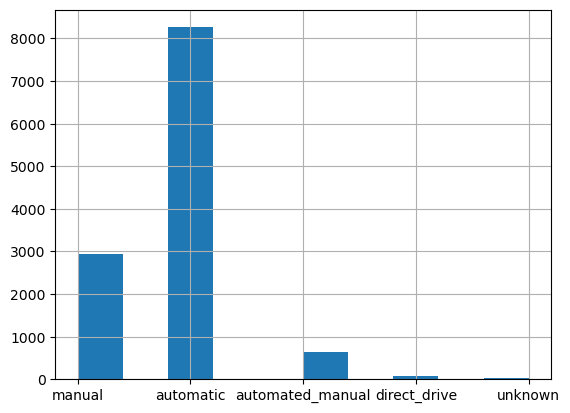

In [122]:
df.transmission_type.hist()

In [123]:
print("The most frequent observation is 'automatic'")

The most frequent observation is 'automatic'


### Q2

In [124]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
numerical_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

In [125]:
df[numerical_columns].corrwith(df.price).abs().sort_values(ascending=False)

price               1.000000
engine_hp           0.650095
engine_cylinders    0.526274
year                0.227590
highway_mpg         0.160043
city_mpg            0.157676
dtype: float64

In [126]:
print("The biggests variables with correlation are: \n - engine_hp \n - engine_cylinders")

The biggests variables with correlation are: 
 - engine_hp 
 - engine_cylinders


In [127]:
df.price.describe().round(2)

count      11914.00
mean       40594.74
std        60109.10
min         2000.00
25%        21000.00
50%        29995.00
75%        42231.25
max      2065902.00
Name: price, dtype: float64

In [128]:
# MAKE PRICE BINARY
above_average = [1 if item > df.price.mean() else 0 for item in df.price ]
price_original = df["price"]
df["price"] = above_average

In [129]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,1


In [130]:
# SPLIT THE DATA
from sklearn.model_selection import train_test_split

In [131]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [132]:
# train and validation
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [133]:
df_train.shape, df_val.shape, df_test.shape

((7148, 10), (2383, 10), (2383, 10))

In [134]:
df_train.shape[0] + df_val.shape[0] + df_test.shape[0]

11914

In [135]:
df.shape

(11914, 10)

In [136]:
# Shuffing indices and getting "y" variables
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [137]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [138]:
del df_train["price"]
del df_val["price"]
del df_test["price"]

### Q3

In [139]:
# Mutual Information Score
from sklearn.metrics import mutual_info_score

In [140]:
# Relative importance of variables analyzed with fucntion
def mutual_info_target_score(series):
    return mutual_info_score(series, y_train)

In [141]:
#mutual_info_target_score()
mi = df_train[categorical_columns].apply(mutual_info_target_score)
mi.sort_values(ascending=False)

model                0.462344
make                 0.239769
vehicle_style        0.084143
transmission_type    0.020958
dtype: float64

In [142]:
print("The lowest mutual information score is: transmission_type")

The lowest mutual information score is: transmission_type


### Q4

In [143]:
# ONE/HOT ENCODING (OHE)
from sklearn.feature_extraction import DictVectorizer

In [144]:
categorical_numerica_columns = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']

In [145]:
train_dicts = df_train.to_dict(orient="records")

In [146]:
train_dicts[1]

{'make': 'kia',
 'model': 'borrego',
 'year': 2009,
 'engine_hp': 276.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 21,
 'city_mpg': 17}

In [147]:
dv = DictVectorizer(sparse=False)

In [148]:
X_train = dv.fit_transform(train_dicts)

In [149]:
X_train.shape

(7148, 943)

In [150]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

----------------------

In [151]:
# TRAIN A LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [152]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [153]:
y_pred = model.predict(X_val)

In [154]:
df_pred = pd.DataFrame()
df_pred["prediction"] = y_pred
df_pred["actual"] = y_val
df_pred["correct"] = df_pred.prediction == df_pred.actual

In [155]:
df_pred

,prediction,actual,correct
0,0,0,True
1,1,1,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
2378,0,0,True
2379,0,0,True
2380,0,0,True
2381,1,1,True


In [156]:
#accuracy = df_pred.correct.mean()
accuracy = accuracy_score(y_val, y_pred)
print("The accuracy was: ", accuracy)

The accuracy was:  0.9471254720939991


In [157]:
df_pred.correct.mean()

0.9471254720939991

In [158]:
y_pred[:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

### Q5

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
df_full_train[numerical_columns].corrwith(df_full_train.price).abs().sort_values(ascending=False)

price               1.000000
engine_hp           0.660670
engine_cylinders    0.453162
year                0.318753
city_mpg            0.157912
highway_mpg         0.134484
dtype: float64

In [161]:
features = df_train.columns.to_list()
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [162]:
original_score = accuracy
scores = pd.DataFrame(columns=["eliminated_features", "accuracy", "difference"])

for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient="records")
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient="records")
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    scores.loc[len(scores)] = [feature, score, original_score - score]

In [163]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_features,accuracy,difference
0,make,0.948384,-0.001259
2,year,0.948384,-0.001259


In [164]:
scores

,eliminated_features,accuracy,difference
0,make,0.948384,-0.001259
1,model,0.916072,0.031053
2,year,0.948384,-0.001259
3,engine_hp,0.922786,0.024339
4,engine_cylinders,0.947125,0.000000
5,transmission_type,0.945447,0.001679
6,vehicle_style,0.937054,0.010071
7,highway_mpg,0.944188,0.002937
8,city_mpg,0.932438,0.014687


### Q6

In [165]:
from sklearn.linear_model import LinearRegression

In [167]:
df["price"] = price_original
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


In [168]:
df["price"] = np.log1p(df["price"])
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,10.739349
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,10.612779
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,10.500977
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,10.290483
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,10.448744
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,10.739024
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,10.945018
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,10.832122
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,10.838031


In [199]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [200]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [201]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [202]:
df_train = df_train.drop("price", axis=1)
df_val = df_val.drop("price", axis=1)
df_test = df_test.drop("price", axis=1)

assert "price" not in df_train.columns
assert "price" not in df_val.columns
assert "price" not in df_test.columns

In [207]:
y_train.shape[0], y_val.shape[0], y_test.shape[0]

(7148, 2383, 2383)

In [211]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

In [212]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [213]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = mean_squared_error(y_val, y_pred, squared=False) # True MSE, false RMSE
    scores[alpha] = round(score ,3)
    print(f"Alpha = {alpha}: \t RMSE = {score}")
    

Alpha = 0: 	 RMSE = 0.48679431324238776
Alpha = 0.01: 	 RMSE = 0.48679455192752585
Alpha = 0.1: 	 RMSE = 0.48679670001899644
Alpha = 1: 	 RMSE = 0.48681817454327414
Alpha = 10: 	 RMSE = 0.4870322832975113


In [214]:
scores

{0: 0.487, 0.01: 0.487, 0.1: 0.487, 1: 0.487, 10: 0.487}

In [215]:
print("The smallest alpha is: ", min(scores, key=scores.get))

The smallest alpha is:  0
